In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df1 = pd.read_csv('analytic_data2019.csv', low_memory=False)
xcl = pd.ExcelFile('2019_County_Health_Rankings_Data_v2.xls')

In [3]:
outcomes_fact_r = pd.read_excel(xcl, sheet_name='Outcomes & Factors Rankings')

In [4]:
outcomes_fact_r.columns = list(outcomes_fact_r.iloc[0])
outcomes_fact_r.drop([0],inplace=True)

In [5]:
outcomes_fact_r.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,7,1,11,1
2,01003,Alabama,Baldwin,67,2,1,3,1
3,01005,Alabama,Barbour,67,33,2,58,4
4,01007,Alabama,Bibb,67,40,3,29,2
5,01009,Alabama,Blount,67,22,2,16,1


In [6]:
outcomes_fact_subr = pd.read_excel(xcl, sheet_name='Outcomes & Factors SubRankings')
outcomes_fact_subr.columns = list(outcomes_fact_subr.iloc[0])
outcomes_fact_subr.drop([0],inplace=True)

In [7]:
outcomes_fact_subr.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,8,1,5,1,15,1,14,1,5,1,50,3
2,01003,Alabama,Baldwin,67,3,1,4,1,3,1,4,1,3,1,62,4
3,01005,Alabama,Barbour,67,14,1,48,3,53,4,30,2,61,4,32,2
4,01007,Alabama,Bibb,67,47,3,24,2,38,3,16,1,38,3,31,2
5,01009,Alabama,Blount,67,36,3,14,1,10,1,41,3,15,1,53,4


In [8]:
ranked_measure = pd.read_excel(xcl, sheet_name='Ranked Measure Data')
ranked_measure.columns = list(ranked_measure.iloc[0])
ranked_measure.drop([0],inplace=True)

In [9]:
ranked_measure.head()

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,95% CI - High,Quartile,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low,95% CI - High,Quartile
1,01001,Alabama,Autauga,8824.06,7935.33,9712.79,1,10471.3,NaN,8706.66,...,88.9008,3,82.722,NaN,83.71,20911,38.3,34.3627,42.2373,3
2,01003,Alabama,Baldwin,7224.63,6794.13,7655.14,1,10042.5,3086.61,7277.78,...,86.5707,2,84.9219,68.3439,83.7991,74415,40.5,38.1835,42.8165,3
3,01005,Alabama,Barbour,9586.17,8200.12,10972.2,1,11332.6,NaN,7309.64,...,85.7693,1,80.1547,NaN,86.2453,7242,33.8,28.8672,38.7328,2
4,01007,Alabama,Bibb,11783.5,10160,13407.1,3,14812.5,NaN,11327.6,...,90.6773,3,NaN,NaN,NaN,6930,48.6,40.3108,56.8892,4
5,01009,Alabama,Blount,10908.1,9895.58,11920.6,3,NaN,5619.65,11336,...,88.8468,3,NaN,81.7672,83.4145,18426,59.7,55.4807,63.9193,4


In [10]:
add_measure = pd.read_excel(xcl, sheet_name='Additional Measure Data')
add_measure.columns = list(add_measure.iloc[0])
add_measure.drop([0],inplace=True)

In [11]:
add_measure.head()

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural,% Rural
1,01001,Alabama,Autauga,76.3306,75.5541,77.1071,74.6006,NaN,76.3372,815,...,2.85745,41336,74.4739,430,0.828548,0.422472,1.23462,51.3422,22921,42.0022
2,01003,Alabama,Baldwin,78.5995,78.2084,78.9906,75.6289,98.0399,78.537,2827,...,4.5502,176582,83.0474,872,0.454512,0.282144,0.62688,51.4528,77060,42.2791
3,01005,Alabama,Barbour,75.7795,74.6394,76.9196,74.2402,NaN,77.5684,451,...,4.20657,11613,45.9557,297,1.19927,0.580536,1.81801,47.2299,18613,67.7896
4,01007,Alabama,Bibb,73.9283,72.6246,75.2319,72.2947,NaN,74.1095,445,...,2.63808,16842,74.2986,84,0.394348,0,0.933361,46.4531,15663,68.3526
5,01009,Alabama,Blount,74.5978,73.811,75.3845,NaN,78.5771,74.0982,1050,...,9.5651,50439,86.9443,1013,1.87,1.36418,2.37583,50.6886,51562,89.9515


In [12]:
add_measure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3142
Columns: 111 entries, FIPS to % Rural
dtypes: object(111)
memory usage: 2.7+ MB


In [13]:
df1.drop([0],inplace=True)
df1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Columns: 534 entries, State FIPS Code to Population growth raw value
dtypes: object(534)
memory usage: 13.0+ MB


In [15]:
life_exp = add_measure[['FIPS','State','County','Life Expectancy', '% Frequent Physical Distress',
                       '% Frequent Mental Distress', '% Diabetic', '% Food Insecure',
                        '% Insufficient Sleep', 'Household Income', '% Homeowners',
                       '% Severe Housing Cost Burden', 'Population']]
life_exp.head()

,FIPS,State,County,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden,Population
1,01001,Alabama,Autauga,76.3306,12.8244,12.6384,14.2,13.4,35.9054,58343,73.2877,12.6452,55504
2,01003,Alabama,Baldwin,78.5995,12.622,12.8226,11.3,12.3,33.3059,56607,72.8593,12.7959,212628
3,01005,Alabama,Barbour,75.7795,16.2162,14.6323,18,23.2,38.5632,32490,62.5068,13.5868,25270
4,01007,Alabama,Bibb,73.9283,13.163,12.854,14.9,15.8,38.1489,45795,75.3615,8.73389,22668
5,01009,Alabama,Blount,74.5978,13.7201,13.8279,14.3,11,35.945,48253,78.521,8.1945,58013


In [16]:
factors = ranked_measure[['FIPS',
                         '% Fair/Poor','Physically Unhealthy Days','Mentally Unhealthy Days',
                         '% LBW', '% Smokers', '% Obese', 'Food Environment Index',
                         '% Physically Inactive', '% With Access', '% Excessive Drinking',
                         '% Alcohol-Impaired','Chlamydia Rate', 'Teen Birth Rate', '% Uninsured',
                          'Dentist Rate', 'MHP Rate',
                         'MHP Ratio', 'Preventable Hosp. Rate', '% Screened', '% Vaccinated',
                         'Graduation Rate', '% Some College', '% Unemployed', '% Children in Poverty',
                          'Income Ratio', '% Single-Parent Households', 'Association Rate',
                          'Injury Death Rate', 'Average Daily PM2.5',
                         'Presence of violation', '% Severe Housing Problems','% Drive Alone',
                         '% Long Commute - Drives Alone']]

In [17]:
print('Factors shape:', factors.shape)
print('Life Expectancy shape:', life_exp.shape)

Factors shape: (3142, 34)
Life Expectancy shape: (3142, 13)


In [18]:
df_merged = life_exp.merge(factors, how='left',on='FIPS')

In [19]:
df_merged.dropna(subset=['Life Expectancy'], inplace=True)
df_merged.drop(['MHP Rate', 'MHP Ratio'],axis=1, inplace=True)

In [20]:
df_final = df_merged.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 3141
Data columns (total 44 columns):
FIPS                             2734 non-null object
State                            2734 non-null object
County                           2734 non-null object
Life Expectancy                  2734 non-null object
% Frequent Physical Distress     2734 non-null object
% Frequent Mental Distress       2734 non-null object
% Diabetic                       2734 non-null object
% Food Insecure                  2734 non-null object
% Insufficient Sleep             2734 non-null object
Household Income                 2734 non-null object
% Homeowners                     2734 non-null object
% Severe Housing Cost Burden     2734 non-null object
Population                       2734 non-null object
% Fair/Poor                      2734 non-null object
Physically Unhealthy Days        2734 non-null object
Mentally Unhealthy Days          2734 non-null object
% LBW                        

In [21]:
num_col = []
for i in df_final.columns:
    if (type(df_final[i][0]) != str):
        num_col.append(i)
num_col

['Life Expectancy',
 '% Frequent Physical Distress',
 '% Frequent Mental Distress',
 '% Diabetic',
 '% Food Insecure',
 '% Insufficient Sleep',
 'Household Income',
 '% Homeowners',
 '% Severe Housing Cost Burden',
 'Population',
 '% Fair/Poor',
 'Physically Unhealthy Days',
 'Mentally Unhealthy Days',
 '% LBW',
 '% Smokers',
 '% Obese',
 'Food Environment Index',
 '% Physically Inactive',
 '% With Access',
 '% Excessive Drinking',
 '% Alcohol-Impaired',
 'Chlamydia Rate',
 'Teen Birth Rate',
 '% Uninsured',
 'Dentist Rate',
 'Preventable Hosp. Rate',
 '% Screened',
 '% Vaccinated',
 'Graduation Rate',
 '% Some College',
 '% Unemployed',
 '% Children in Poverty',
 'Income Ratio',
 '% Single-Parent Households',
 'Association Rate',
 'Injury Death Rate',
 'Average Daily PM2.5',
 '% Severe Housing Problems',
 '% Drive Alone',
 '% Long Commute - Drives Alone']

In [22]:
num = df_final[num_col].astype('float64')
num.head()

,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden,Population,...,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Association Rate,Injury Death Rate,Average Daily PM2.5,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,76.330589,12.824434,12.638357,14.2,13.4,35.905406,58343.0,73.287736,12.645206,55504.0,...,3.863522,19.3,4.636664,24.700097,12.631731,74.031808,11.7,14.954646,85.965057,38.3
1,78.599498,12.622002,12.822558,11.3,12.3,33.305868,56607.0,72.859338,12.795922,212628.0,...,3.988336,14.7,4.518560,25.184091,10.692213,69.374289,10.3,13.831725,84.719423,40.5
2,75.779457,16.216160,14.632311,18.0,23.2,38.563167,32490.0,62.506800,13.586765,25270.0,...,5.900923,50.3,5.755063,57.215743,8.472944,72.900134,11.5,15.455531,83.404353,33.8
3,73.928271,13.162968,12.854036,14.9,15.8,38.148865,45795.0,75.361481,8.733889,22668.0,...,4.385140,27.3,4.254594,29.565404,10.157665,100.077937,11.2,10.960854,86.365902,48.6
4,74.597767,13.720057,13.827943,14.3,11.0,35.945010,48253.0,78.521025,8.194495,58013.0,...,4.021393,18.5,4.126883,29.569733,9.011507,105.197227,11.7,10.401153,86.792275,59.7


In [23]:
num.corrwith(num['Life Expectancy']).abs().sort_values(ascending=False)

Life Expectancy                  1.000000
% Smokers                        0.735500
% Frequent Mental Distress       0.718220
% Frequent Physical Distress     0.703328
Teen Birth Rate                  0.698951
Physically Unhealthy Days        0.697318
% Diabetic                       0.695777
% Children in Poverty            0.695308
% Physically Inactive            0.688055
Household Income                 0.681899
% Fair/Poor                      0.670568
Mentally Unhealthy Days          0.660004
% Food Insecure                  0.629652
Injury Death Rate                0.607755
% Excessive Drinking             0.590625
% Obese                          0.587552
% Some College                   0.581596
% Insufficient Sleep             0.542798
Food Environment Index           0.540740
% LBW                            0.537213
% Single-Parent Households       0.517407
Preventable Hosp. Rate           0.499159
% With Access                    0.444433
% Unemployed                     0

In [27]:
#Let's get top 5 columns with the highest correlation to Life Expectancy and plot a heatmap
df_five = num[['Life Expectancy', '% Smokers', '% Frequent Mental Distress', 
               '% Frequent Physical Distress', 'Teen Birth Rate', 'Physically Unhealthy Days']]

In [28]:
df_five.corr()

,Life Expectancy,% Smokers,% Frequent Mental Distress,% Frequent Physical Distress,Teen Birth Rate,Physically Unhealthy Days
Life Expectancy,1.000000,-0.735500,-0.718220,-0.703328,-0.698951,-0.697318
% Smokers,-0.735500,1.000000,0.820648,0.809802,0.583437,0.806131
% Frequent Mental Distress,-0.718220,0.820648,1.000000,0.952346,0.607429,0.949235
% Frequent Physical Distress,-0.703328,0.809802,0.952346,1.000000,0.689219,0.982123
Teen Birth Rate,-0.698951,0.583437,0.607429,0.689219,1.000000,0.647170
Physically Unhealthy Days,-0.697318,0.806131,0.949235,0.982123,0.647170,1.000000


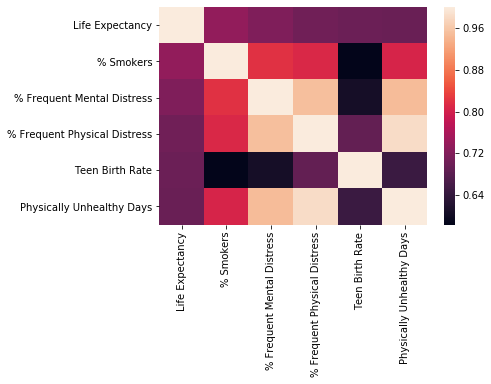

In [30]:
sns.heatmap(df_five.corr().abs())

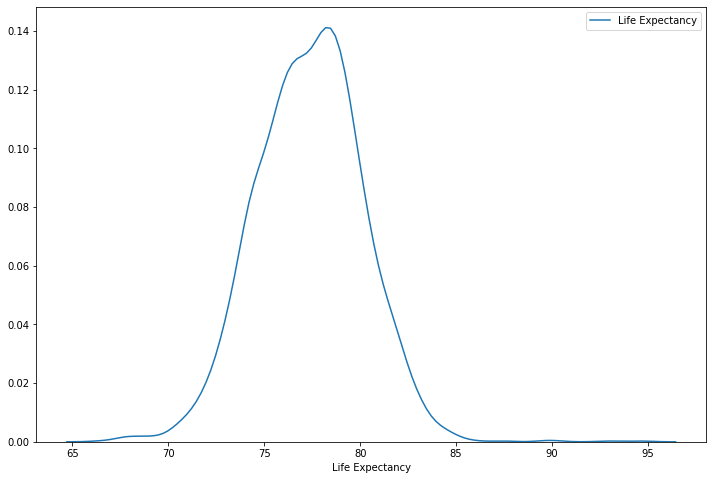

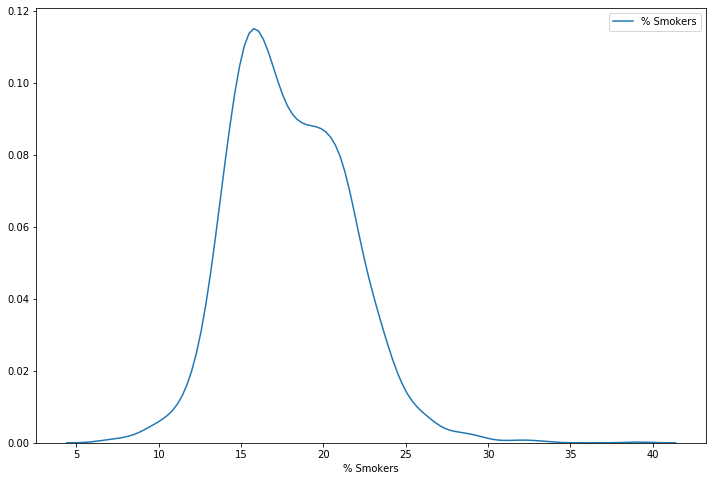

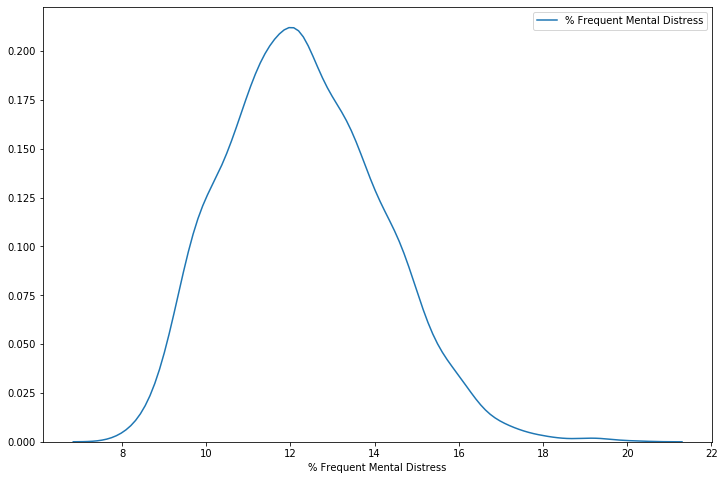

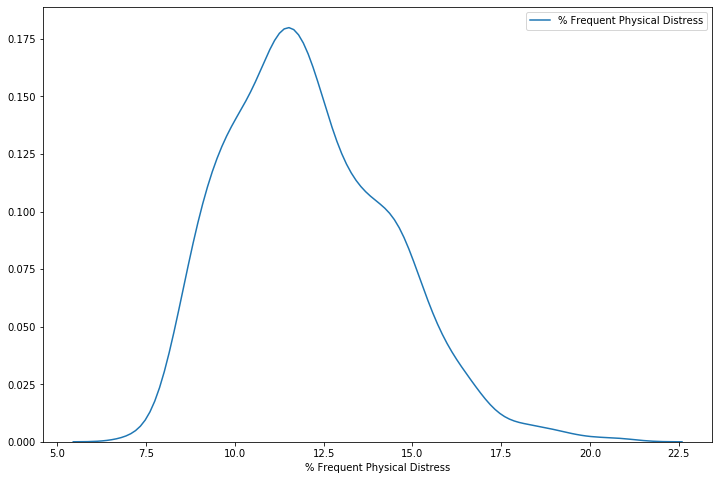

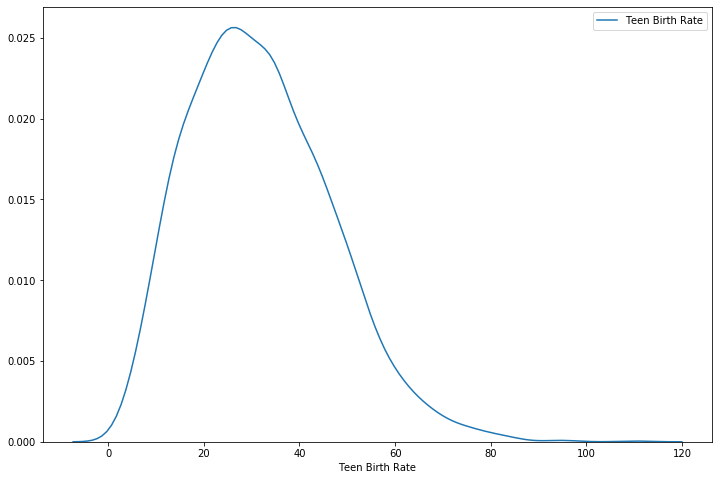

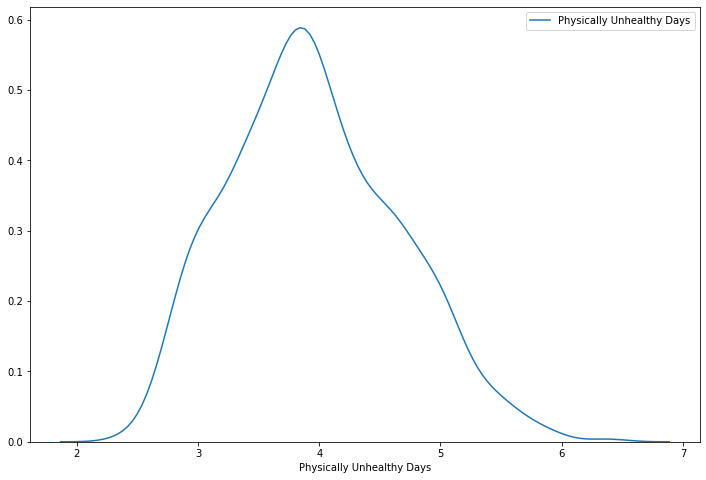

In [33]:
for i in df_five.columns:
    fig = plt.figure(figsize=(12,8))
    sns.distplot(df_five[i], label=i, hist=False)